# Credit Card Fraud Classification

Raafi Rahman

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler

from scipy import stats

### Load Data

In [2]:
data = pd.read_csv("./card_transdata.csv")

In [3]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

### Data Exploration

In [5]:
data.isna().sum().sum()

0

Remove Outliers

In [6]:
data = data[(np.abs(stats.zscore(data['distance_from_home'])) < 3)]
data = data[(np.abs(stats.zscore(data['distance_from_last_transaction'])) < 3)]
data = data[(np.abs(stats.zscore(data['ratio_to_median_purchase_price'])) < 3)]

In [7]:
len(data[data['fraud'] == 1]) / len(data)

0.07026264770233884

Dataset is imbalanced

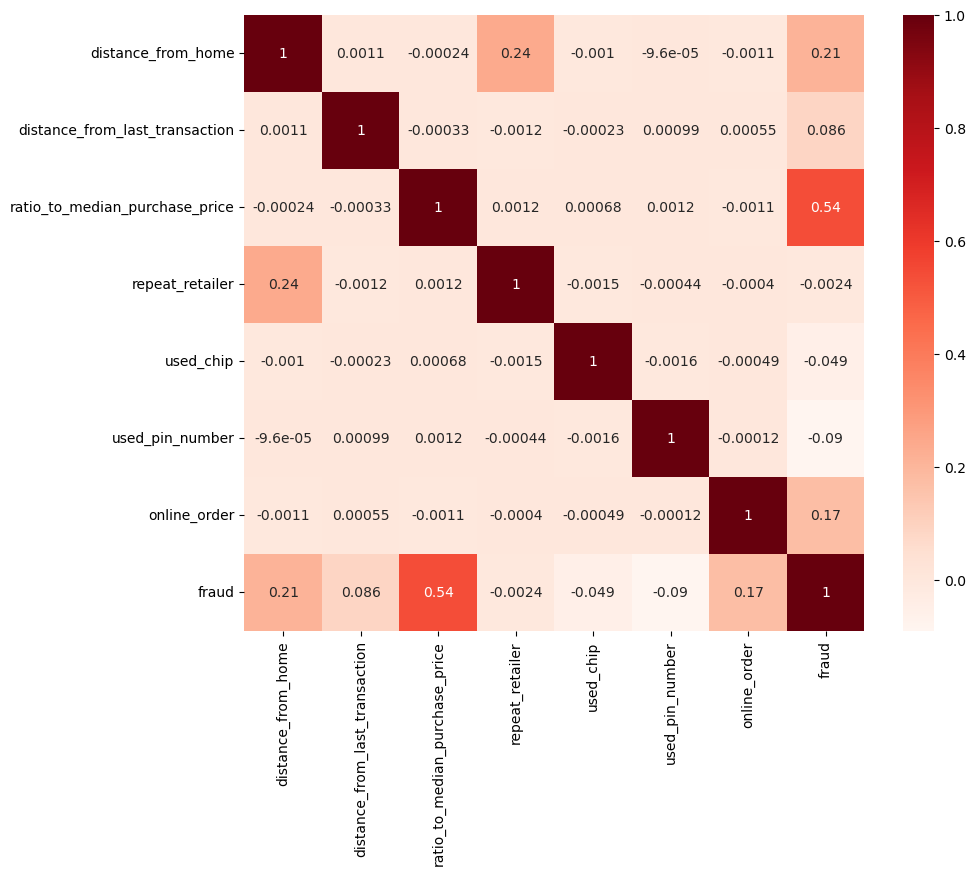

In [8]:
cor = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

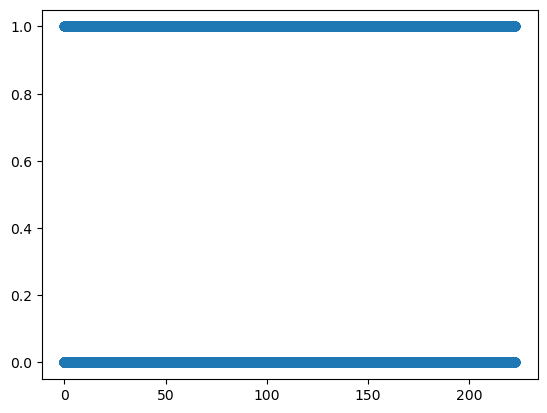

In [9]:
plt.scatter(data['distance_from_home'], data['fraud'])

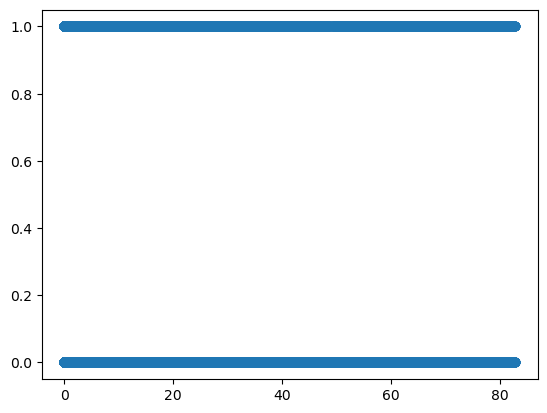

In [10]:
plt.scatter(data['distance_from_last_transaction'], data['fraud'])

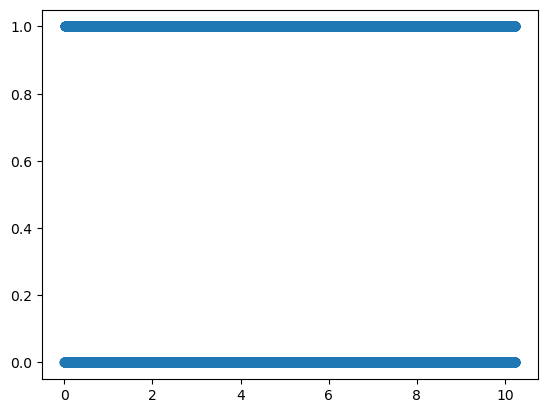

In [11]:
plt.scatter(data['ratio_to_median_purchase_price'], data['fraud'])

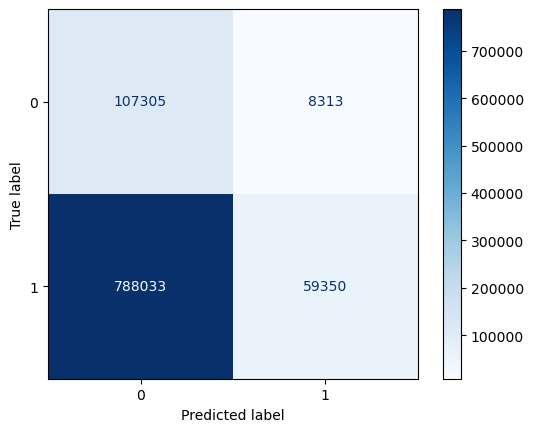

In [12]:
cm = confusion_matrix(data['repeat_retailer'], data['fraud'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

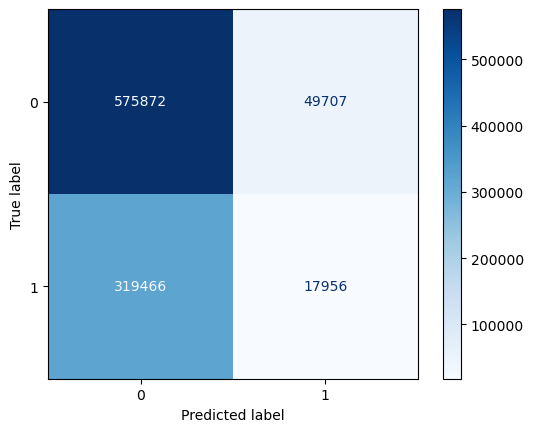

In [13]:
cm = confusion_matrix(data['used_chip'], data['fraud'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

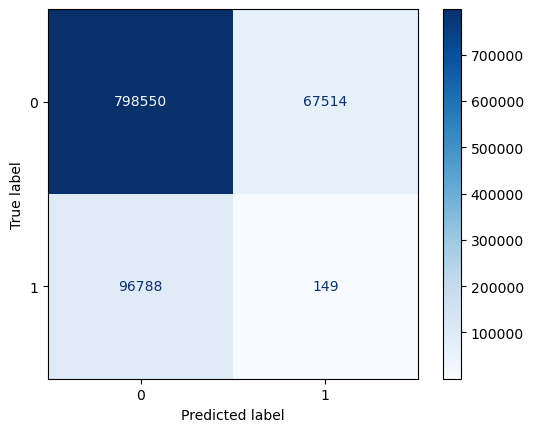

In [14]:
cm = confusion_matrix(data['used_pin_number'], data['fraud'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

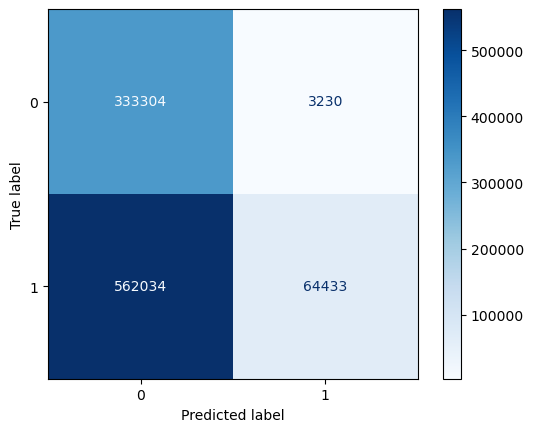

In [15]:
cm = confusion_matrix(data['online_order'], data['fraud'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

### Scale Data

In [16]:
features = data.drop(columns = ['fraud'])

In [17]:
scaledX = StandardScaler().fit_transform(features)

In [18]:
df = pd.DataFrame(scaledX)

In [19]:
df

,0,1,2,3,4,5,6
0,1.171127,-0.419694,0.222750,0.36938,1.361615,-0.334557,-1.364378
1,-0.339207,-0.436156,-0.164291,0.36938,-0.734422,-0.334557,-1.364378
2,-0.523436,-0.359700,-0.678886,0.36938,-0.734422,-0.334557,0.732935
3,-0.614719,0.222606,-0.717518,0.36938,1.361615,-0.334557,0.732935
4,0.731749,-0.388684,0.387151,0.36938,1.361615,-0.334557,0.732935
...,...,...,...,...,...,...,...
962996,-0.616018,-0.443799,0.033219,0.36938,1.361615,-0.334557,-1.364378
962997,-0.048915,-0.131539,0.717069,0.36938,1.361615,-0.334557,-1.364378
962998,-0.593298,-0.278633,-0.803385,0.36938,1.361615,-0.334557,0.732935
962999,-0.550157,-0.428088,-0.650316,0.36938,-0.734422,-0.334557,0.732935


### Clustering: K-means

In [20]:
num_clust = 3

In [21]:
kmeans = KMeans(n_clusters = num_clust)
kmeans.fit(df)
labels = kmeans.labels_

(array([551194.,      0.,      0.,      0.,      0., 115618.,      0.,
             0.,      0., 296189.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

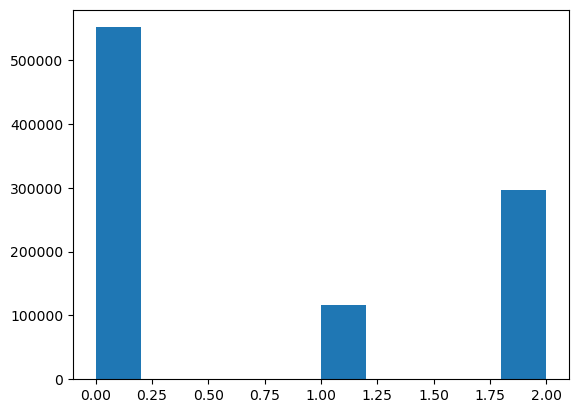

In [22]:
plt.hist(labels)

In [23]:
for clusterNum in range(num_clust):
    nums = np.where(labels == clusterNum)
    cluster_data = data.iloc[nums]
    means = cluster_data.mean()
    percent_fraud = means['fraud']
    print(f"Cluster {clusterNum} contains {percent_fraud} fraud")

Cluster 0 contains 0.10544381832893682 fraud
Cluster 1 contains 0.07190056911553565 fraud
Cluster 2 contains 0.00415275381597561 fraud


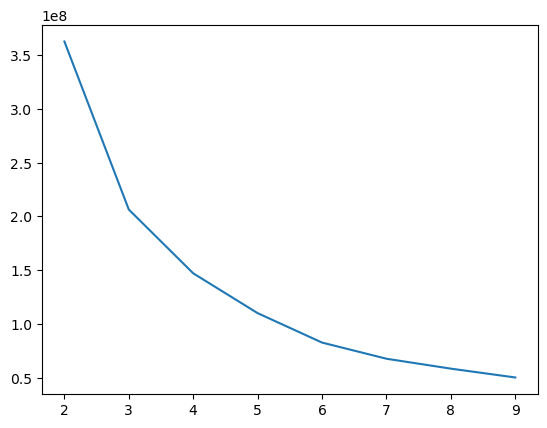

In [24]:
errors = []

for i in range(2, 10, 1):
    km = KMeans(n_clusters = i)
    km.fit(features)
    errors.append(km.inertia_)

plt.plot(range(2, 10, 1), errors)
plt.show()

### Train Test Split

In [25]:
X = df

In [26]:
y = data['fraud']

<AxesSubplot:ylabel='fraud'>

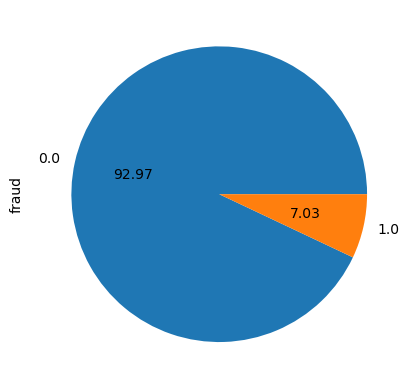

In [27]:
y.value_counts().plot.pie(autopct = '%.2f')

### Under-sampling

<AxesSubplot:ylabel='fraud'>

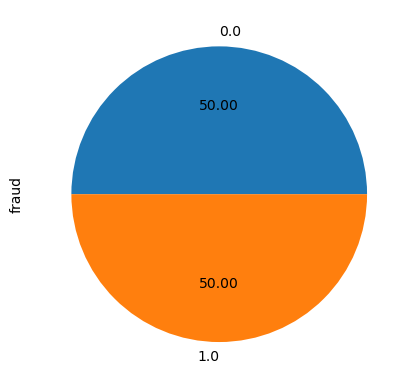

In [28]:
rus = RandomUnderSampler(sampling_strategy = 1)
Xsamp, ysamp = rus.fit_resample(X, y)
ysamp.value_counts().plot.pie(autopct = '%.2f')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Xsamp, ysamp, test_size=0.3)

### Decision Tree

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
dtree.score(X_test, y_test)

0.9999507364894823

In [33]:
preds = dtree.predict(X_test)

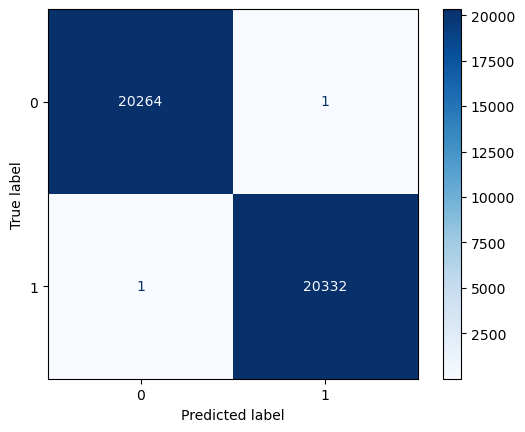

In [34]:
cm = confusion_matrix(preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

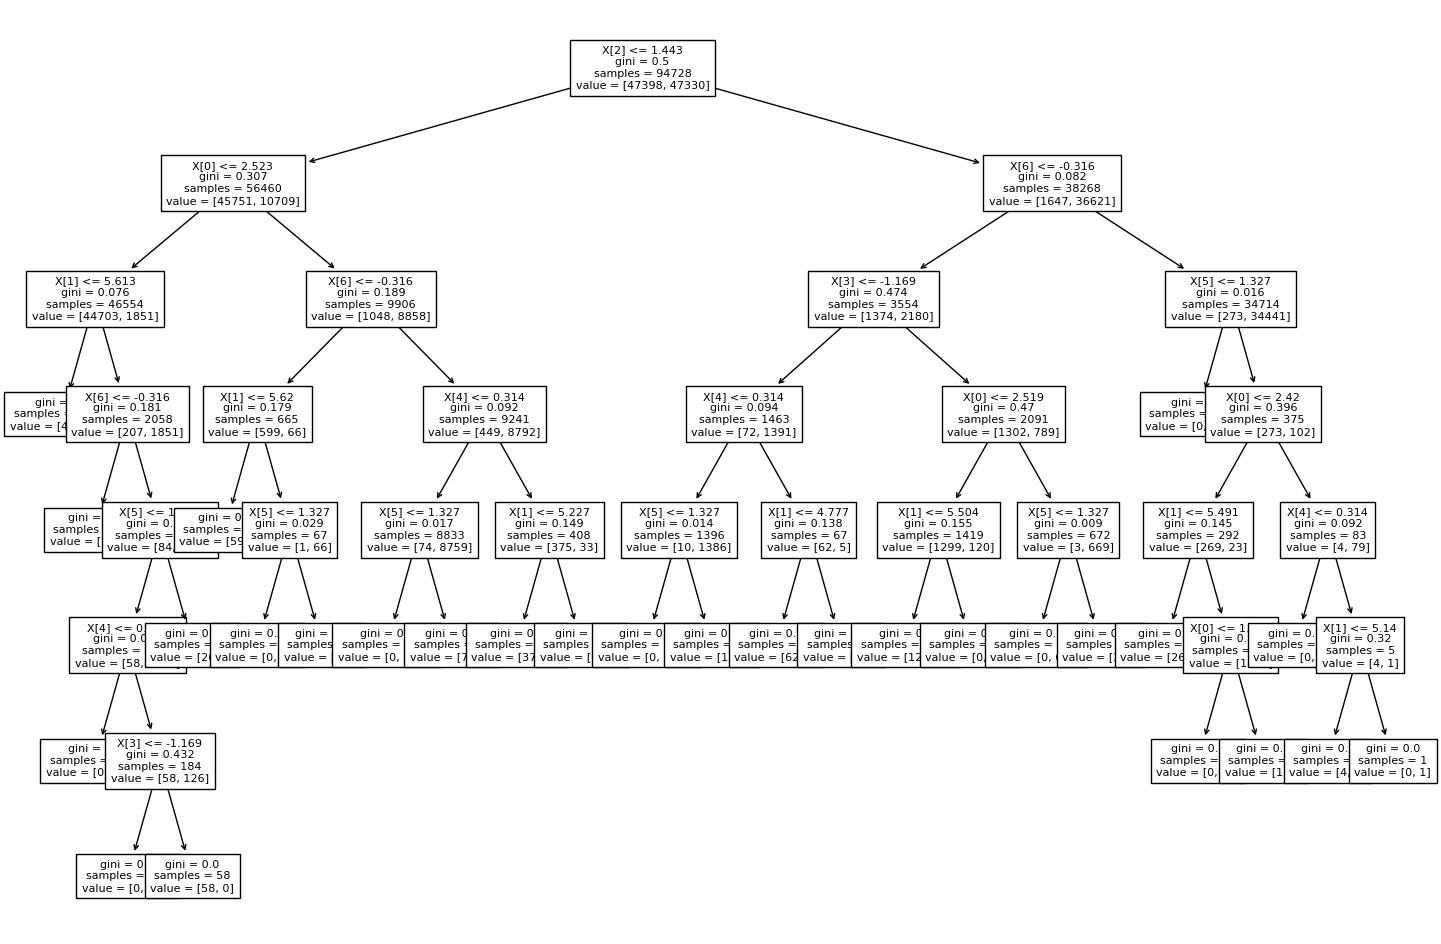

In [35]:
plt.figure(figsize=(18, 12))
plot_tree(dtree, impurity = True, fontsize = 8)
plt.show()

### Gridsearch

In [36]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}

In [37]:
grid = GridSearchCV(dtree,
                    param_grid = param_dict,
                    cv = 10,
                    verbose = 1,
                    n_jobs = -1)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\Raafi\anaconda3\envs\DL\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Raafi\anaconda3\envs\DL\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Raafi\anaconda3\envs\DL\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\Raafi\anaconda3\envs\DL\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C:\Users\Raafi\anaconda3\envs\DL\lib\site

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [38]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [39]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=6)

In [40]:
grid.best_score_

0.9999472184102185

In [41]:
gridPreds = grid.predict(X_test)

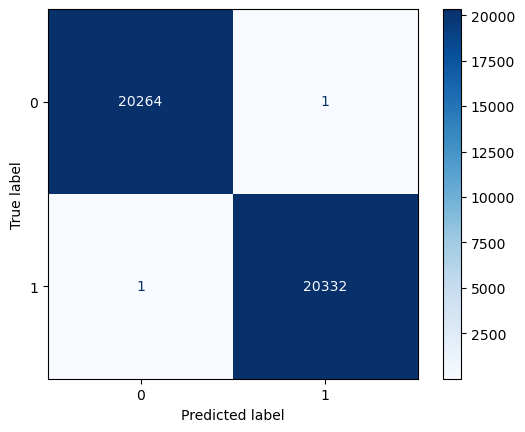

In [42]:
cm = confusion_matrix(gridPreds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

### Random Forest

In [43]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
preds = forest.predict(X_test)

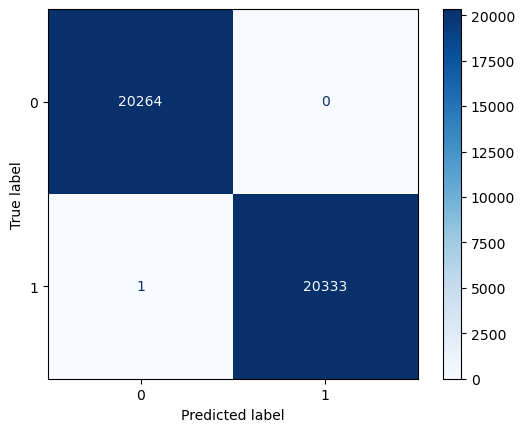

In [45]:
cm = confusion_matrix(preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

### Gridsearch

In [46]:
param_dict = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [47]:
grid = GridSearchCV(forest,
                    param_grid = param_dict,
                    cv = 5,
                    verbose = 1,
                    n_jobs = -1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [48]:
grid.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500)

In [49]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [50]:
grid.best_score_

0.9999577736137575

In [51]:
gridPreds = grid.predict(X_test)

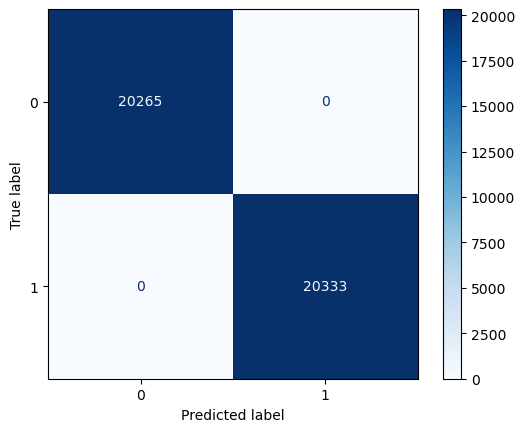

In [52]:
cm = confusion_matrix(gridPreds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

### Support Vector Machines

In [53]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [54]:
preds = svc.predict(X_test)

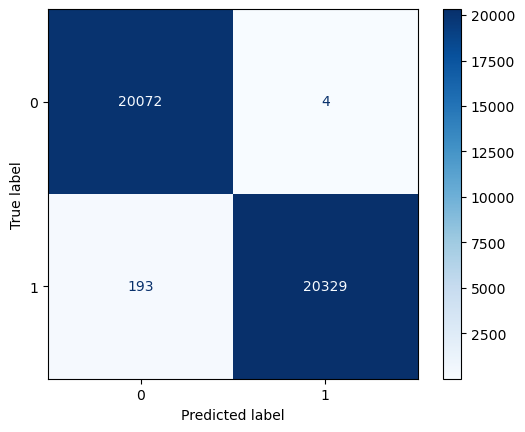

In [55]:
cm = confusion_matrix(preds, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()